 Machine Learning for Genomic Data.

Task: Apply machine learning algorithms, such as random forests or support vector machines, to classify genomic data based on specific features or markers.

Deliverable: A comprehensive analysis report presenting the classification results, model performance evaluation, and insights into the predictive features.

**Theory**

**Genomic data** refers to information derived from the DNA of an organism, encompassing the complete set of its genetic material. This data includes the sequences of nucleotides (adenine, thymine, cytosine, and guanine) that make up the DNA, as well as information on genes, regulatory elements, and other functional regions within the genome.

### Types of Genomic Data

1. **DNA Sequences**: This is the fundamental raw data that represents the exact order of nucleotides in an organism’s genome. It can include the entire genome sequence or specific sections of it, such as genes or chromosomes.

2. **Annotations**: These include information about where genes and other functional elements are located in the genome, as well as their roles and characteristics, such as start and stop codons, coding regions, and regulatory regions.

3. **Gene Expression Data**: While this is related to genomics, it reflects the activity of genes rather than their sequences. This data shows which genes are active under specific conditions or in different tissue types and developmental stages.

4. **Variant Data**: Variants are differences in DNA sequences between individuals or populations. Variant data includes SNPs (single nucleotide polymorphisms), insertions, deletions, and structural variations, which are crucial for understanding genetic diversity and disease.

5. **Epigenomic Data**: This includes modifications to the DNA or associated proteins that affect gene expression without altering the DNA sequence itself, such as DNA methylation patterns or histone modifications.

### Importance of Genomic Data

1. **Disease Research and Medicine**: Genomic data allows researchers to identify genetic causes of diseases, leading to better diagnostic tools, treatments, and the development of personalized medicine.

2. **Evolution and Population Genetics**: By comparing genomes across different species or populations, scientists can study evolutionary relationships and understand genetic diversity, adaptation, and migration patterns.

3. **Drug Discovery and Development**: Genomic data aids in identifying drug targets by revealing the genes and pathways involved in diseases, helping to develop more effective treatments.

4. **Agriculture and Breeding**: In plants and animals, genomic data is used to select traits for improved crop yields, resistance to pests, and other desirable qualities.

5. **Forensic Science**: Genomic data can identify individuals or relate them to particular populations, making it useful for forensics and ancestry research.

In summary, genomic data provides the foundation for understanding the genetic blueprint of organisms and has broad applications across biology, medicine, agriculture, and biotechnology.

In [ ]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, f1_score


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

**Label encoder** for encoding categorical labels as numerical values if necessary

In [ ]:
df = pd.read_csv("/content/METABRIC_RNA_Mutation.csv")

<ipython-input-26-2ec8a844f1db>:1: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/METABRIC_RNA_Mutation.csv")


**Metabric** contains genetic and survival data for patients

In [ ]:
df.head(10)

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
5,10,78.77,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
6,14,56.45,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
7,22,89.08,BREAST CONSERVING,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
8,28,86.41,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
9,35,84.22,MASTECTOMY,Breast Cancer,Breast Invasive Lobular Carcinoma,High,0,Her2,1.0,Negative,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(1904, 693)

In [ ]:
#df.info(verbose=True)

**Verbose = True** ensures all columns are displayed in output, which can be useful for thoroughly checking the dataset structure, column names and types.

In [ ]:
df.isna().sum()

,0
patient_id,0
age_at_diagnosis,0
type_of_breast_surgery,22
cancer_type,0
cancer_type_detailed,15
...,...
hras_mut,0
prps2_mut,0
smarcb1_mut,0
stmn2_mut,0


In [ ]:
df.sample(5)

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
1686,7019,68.44,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0
737,3545,49.84,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumA,2.0,Positve,...,0,0,0,0,0,0,0,0,0,0
82,166,44.98,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,1,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
867,4548,50.42,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,1,Her2,3.0,Negative,...,0,0,0,0,0,0,0,0,0,0
356,521,52.20,MASTECTOMY,Breast Cancer,Breast Invasive Lobular Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df=df.set_index('patient_id')

In [ ]:
df.head()

,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
patient_id,,,,,,,,,,,,,,,,,,,,,
0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0
2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0
5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0
6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0
8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,Positive,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_exp = df.iloc[:,30:519].join(df['overall_survival'], how='inner')
df_exp
#Combines important features and target variable

,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,...,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7,overall_survival
patient_id,,,,,,,,,,,,,,,,,,,,,
0,-1.3990,-0.5738,-1.6217,1.4524,0.3504,1.1517,0.0348,0.1266,-0.8361,-0.8578,...,-0.0194,-1.6345,-0.2142,-0.5698,-1.1741,-1.4779,-0.5954,-0.8847,-0.3354,1
2,-1.3800,0.2777,-1.2154,0.5296,-0.0136,-0.2659,1.3594,0.7961,0.5419,-2.6059,...,0.4534,0.4068,0.7634,0.0231,0.9121,-0.9538,-0.2264,0.5398,-0.8920,1
5,0.0670,-0.8426,0.2114,-0.3326,0.5141,-0.0803,1.1398,0.4187,-0.4030,-1.1305,...,0.0668,0.8344,1.7227,0.4024,-3.7172,-1.5538,1.3701,-0.1078,0.3655,0
6,0.6744,-0.5428,-1.6592,0.6369,1.6708,-0.8880,1.2491,-1.1889,-0.4174,-0.6165,...,-0.7078,0.8228,0.6819,-0.1948,-2.3286,-0.9924,-0.3154,0.2320,-0.4828,1
8,1.2932,-0.9039,-0.7219,0.2168,0.3484,0.3897,0.9131,0.9356,0.7675,-0.2940,...,-0.3544,-1.0150,2.2961,0.1817,-0.1572,0.0427,5.0048,3.8476,1.3223,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7295,0.1563,0.5543,-0.6149,0.4572,1.3822,-0.0537,-0.1323,0.2837,-0.0726,-0.5500,...,1.5304,1.1196,0.8116,0.0958,-1.2644,-0.3566,-0.2615,-0.6371,-0.5540,1
7296,0.1343,0.9128,1.3017,0.7383,0.1841,0.0028,0.1243,2.2040,-0.6190,-0.8681,...,-0.6610,-0.1610,0.2251,0.5127,-0.3412,-1.0703,-0.6950,0.0641,-0.8863,0
7297,1.8107,-0.2608,0.4006,-0.2985,0.0356,-0.1620,1.5486,1.5309,-1.3653,-0.2529,...,-0.5194,2.3968,0.5917,-0.8643,-1.3541,-1.8076,-0.1840,0.0967,-0.6264,0


In [ ]:
#split the dataset
X=df_exp.drop('overall_survival', axis=1)
y=df['overall_survival']

The code snippet **`X = pd.get_dummies(X, drop_first=True)`** is used for encoding categorical variables in a pandas DataFrame (`X`) into a binary (or "dummy") format, while avoiding multicollinearity.

- **`pd.get_dummies(X)`**: This function converts categorical variables in `X` into multiple binary columns (one for each category within each variable). Each binary column represents the presence (1) or absence (0) of a particular category.
  
- **`drop_first=True`**: By setting `drop_first=True`, the function drops the first category in each categorical variable. This reduces the number of dummy variables created for each categorical feature by one, helping to avoid multicollinearity (which happens when the dummy variables are highly correlated). This is especially useful when the encoded data will be used in regression models, as it helps ensure the variables are linearly independent.

For example, if a feature in `X` has categories `"A"`, `"B"`, and `"C"`, `pd.get_dummies` will create columns like:

- With `drop_first=False`: columns will be `"A"`, `"B"`, and `"C"`.
- With `drop_first=True`: columns will be `"B"` and `"C"` (category `"A"` will be the reference category).

The resulting DataFrame `X` will be ready to be used in machine learning models where numerical input is required.

In [ ]:
X=pd.get_dummies(X,drop_first=True)
if y.dtype=='object':
  y=LabelEncoder().fit_transform(y)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
models = {
    'Random Forest'  : RandomForestClassifier(),
    'SVC' : SVC(probability=True)
}

**model.predict_proba(X_test)[:,1]:**

- predict_proba is a method available in many classification models (e.g., logistic regression, random forest, gradient boosting) that returns the probabilities of each class for each sample in X_test.

- predict_proba(X_test) returns an array where each row corresponds to a sample, and each column represents the probability for a particular class.

- For binary classification, this array will have two columns: the first column (index 0) for class 0 (negative class) and the second column (index 1) for class 1 (positive class).


- [:, 1] selects the probabilities for the positive class (1) across all samples in X_test.


**Purpose**


This line is useful when you’re working with different types of models that may or **may not support probability predictions**. By including this conditional, the code avoids errors when calling predict_proba on models that don’t have it, and it **safely returns None** if probability predictions aren’t available.


=====Random Forest=========
Classification Report :                precision    recall  f1-score   support

           0       0.66      0.81      0.73       343
           1       0.57      0.37      0.45       229

    accuracy                           0.63       572
   macro avg       0.61      0.59      0.59       572
weighted avg       0.62      0.63      0.61       572

Accuracy : 0.6346
F1 Score : 0.6147
AUC-ROC Score : 0.5901


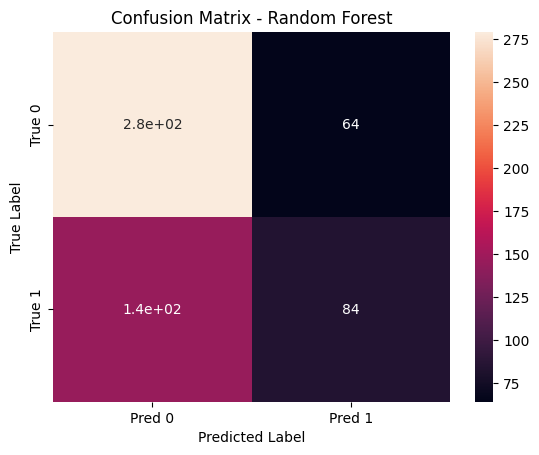


=====SVC=========
Classification Report :                precision    recall  f1-score   support

           0       0.68      0.79      0.73       343
           1       0.59      0.45      0.51       229

    accuracy                           0.66       572
   macro avg       0.64      0.62      0.62       572
weighted avg       0.65      0.66      0.65       572

Accuracy : 0.6556
F1 Score : 0.6454
AUC-ROC Score : 0.6221


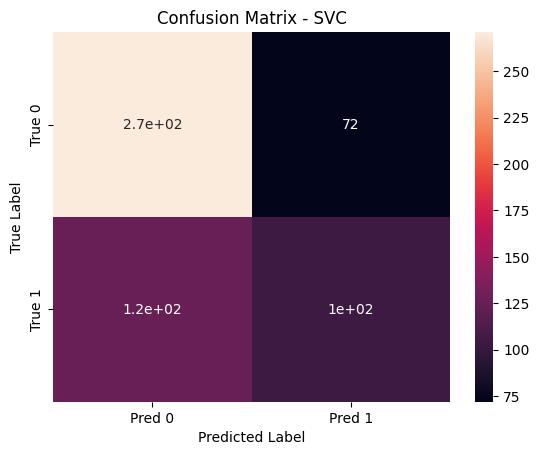

In [ ]:
for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    try:
        y_proba = model.predict_proba(X_test)[:,1]        #0->absence of disease , 1->presence of disease
    except AttributeError:
        y_proba = None
    f1 = f1_score(y_test,y_pred,average='weighted')
    accuracy = accuracy_score(y_test,y_pred)
    print(f"\n====={name}=========")
    print("Classification Report : ",classification_report(y_test,y_pred))
    print(f"Accuracy : {accuracy:.4f}")
    print(f"F1 Score : {f1:.4f}")
    if y_proba is not None:
        print(f"AUC-ROC Score : {roc_auc_score(y_test,y_pred):.4f}")
    cm = confusion_matrix(y_test,y_pred)
    sns.heatmap(cm,annot=True,xticklabels=['Pred 0','Pred 1'],yticklabels=['True 0','True 1'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [ ]:
#---------------------------------------------------------------------

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In machine learning, particularly in classification tasks, various metrics are used to evaluate the performance of models. Here’s a breakdown of the `classification_report`, `confusion_matrix`, `accuracy_score`, `f1_score`, and `roc_auc_score`.

### 1. Classification Report
The `classification_report` provides a comprehensive summary of various classification metrics for a classification model. It includes:

- **Precision**: The ratio of true positive predictions to the total predicted positives (true positives + false positives). It indicates how many of the predicted positive cases were actually positive.

TP/TP+FP

- **Recall (Sensitivity)**: The ratio of true positive predictions to the total actual positives (true positives + false negatives). It measures how many of the actual positive cases were correctly predicted.

TP/TP+FN

- **F1 Score**: The harmonic mean of precision and recall, providing a balance between the two. It is particularly useful when dealing with imbalanced classes.
- **Support**: The number of actual occurrences of the class in the specified dataset.

#### Example Usage:
```python
from sklearn.metrics import classification_report

y_true = [0, 1, 1, 0, 1, 0, 1, 1]  # Actual labels
y_pred = [0, 1, 0, 0, 1, 1, 1, 0]  # Predicted labels

report = classification_report(y_true, y_pred)
print(report)
```

### 2. Confusion Matrix
The `confusion_matrix` provides a tabular representation of the model's predictions against the actual labels. It summarizes the correct and incorrect predictions broken down by class.

- **True Positives (TP)**: Correctly predicted positive cases.
- **True Negatives (TN)**: Correctly predicted negative cases.
- **False Positives (FP)**: Incorrectly predicted positive cases (predicted positive but actual negative).
- **False Negatives (FN)**: Incorrectly predicted negative cases (predicted negative but actual positive).

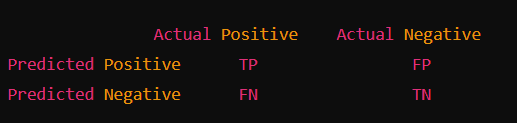               

#### Example Usage:
```python
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_true, y_pred)
print(conf_matrix)
```

### 3. Accuracy Score
The `accuracy_score` measures the overall correctness of the model by calculating the ratio of correct predictions (both true positives and true negatives) to the total number of predictions.

Accuracy = (TP + TN)/(TP + TN + FP + FN)

#### Example Usage:
```python
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)
print(accuracy)
```

### 4. F1 Score
The `f1_score` is a specific metric that combines precision and recall into a single score. It is particularly useful for imbalanced datasets where the distribution of classes is skewed.


F1 = 2 * (Precision *  Recall)/(Precision + Recall)


#### Example Usage:
```python
from sklearn.metrics import f1_score

f1 = f1_score(y_true, y_pred)
print(f1)
```

### 5. ROC AUC Score
The `roc_auc_score` quantifies the ability of a model to distinguish between classes. It is based on the Receiver Operating Characteristic (ROC) curve, which plots the true positive rate (sensitivity) against the false positive rate. The Area Under the ROC Curve (AUC) provides a single scalar value representing the model's performance.

- AUC = 0.5 indicates no discrimination (random guessing).
- AUC = 1 indicates perfect discrimination.

#### Example Usage:
```python
from sklearn.metrics import roc_auc_score

# Example probabilities for the positive class
y_prob = [0.1, 0.9, 0.8, 0.3, 0.6, 0.2, 0.7, 0.4]

roc_auc = roc_auc_score(y_true, y_prob)
print(roc_auc)
```

### Summary
- **`classification_report`**: Summarizes precision, recall, F1-score, and support for each class.
- **`confusion_matrix`**: Provides a matrix showing true vs. predicted classifications.
- **`accuracy_score`**: Measures the proportion of correct predictions.
- **`f1_score`**: Combines precision and recall into a single metric.
- **`roc_auc_score`**: Measures the model's ability to distinguish between classes using the area under the ROC curve.

These metrics are crucial for assessing the performance of classification models and guiding improvements in model training and selection.

**Label encoder** for encoding categorical labels as numerical values if necessary

**Random Forest**

**A Random Forest Classifier** is an ensemble learning method used for classification tasks. It builds multiple decision trees during training and merges their outputs to improve the predictive accuracy and control overfitting. Below are key aspects of the Random Forest Classifier, including how it works, its advantages, and how to implement it.

### How Random Forest Classifier Works

1. **Bootstrapping**: The Random Forest algorithm uses a technique called bootstrap aggregating (or bagging). It creates multiple subsets of the original dataset by randomly sampling with replacement.

2. **Decision Trees**: For each subset, a decision tree is trained. During the construction of each tree, a random subset of features is selected to determine the best split at each node. This introduces diversity among the trees.

3. **Voting**: Once all trees are trained, the Random Forest makes predictions by aggregating the predictions from each individual tree. For classification tasks, the final prediction is typically determined by majority voting among the trees.

### Key Features

- **Robustness**: Random Forest is robust to outliers and noise, making it suitable for a variety of datasets.

- **Overfitting Control**: By averaging the predictions from multiple trees, Random Forest can reduce overfitting compared to a single decision tree.

- **Feature Importance**: The algorithm provides insights into feature importance, which helps in understanding which features are contributing the most to the predictions.

### Advantages of Random Forest Classifier

- **High Accuracy**: It often achieves high accuracy for classification tasks due to its ensemble nature.

- **Handles High Dimensional Data**: Random Forest can effectively handle datasets with a large number of features.

- **Versatility**: It can be used for both binary and multiclass classification problems.

- **Less Hyperparameter Tuning**: Compared to other models, Random Forest requires less tuning of hyperparameters.

### Disadvantages

- **Interpretability**: While it provides feature importance, the model itself can be less interpretable than a single decision tree.

- **Resource Intensive**: Training multiple trees can be computationally expensive and may require more memory.

### Implementation Example in Python

Here is a basic example of how to implement a Random Forest Classifier using Python and the `scikit-learn` library:

```python
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
```

### Key Parameters of Random Forest Classifier

- **n_estimators**: The number of trees in the forest. More trees can lead to better performance but also increased computational cost.

- **max_features**: The number of features to consider when looking for the best split. Can be set to "auto," "sqrt," or a specific number.

- **max_depth**: The maximum depth of the trees. Limiting the depth can help reduce overfitting.

- **min_samples_split**: The minimum number of samples required to split an internal node. Increasing this can also help reduce overfitting.

- **min_samples_leaf**: The minimum number of samples required to be at a leaf node. This parameter can prevent the model from learning overly specific patterns.

### Conclusion

The Random Forest Classifier is a powerful and flexible model suitable for many classification tasks. Its ensemble approach enhances predictive performance while minimizing overfitting, making it a popular choice among data scientists and machine learning practitioners.

**Support Vector Classifier**

**Support Vector Classification (SVC)** is a supervised learning algorithm used for classification tasks. It is part of the broader Support Vector Machine (SVM) framework, which is designed to find a hyperplane that best separates data points of different classes in a high-dimensional space. Here are the key aspects of SVC, including its working principle, advantages, disadvantages, and implementation.

### How SVC Works

1. **Hyperplane**: SVC aims to find the optimal hyperplane that divides the data into two classes. In a two-dimensional space, this hyperplane is a line; in three dimensions, it is a plane; and in higher dimensions, it is a hyperplane.

2. **Maximizing the Margin**: The goal is to maximize the margin, which is the distance between the hyperplane and the nearest data points from each class (called support vectors). A larger margin is generally associated with better generalization on unseen data.

3. **Support Vectors**: Only the data points that are closest to the hyperplane (support vectors) are used to define the hyperplane. This makes SVC efficient and robust to overfitting.

4. **Kernel Trick**: SVC can handle non-linear decision boundaries through the use of kernels. Kernels transform the data into a higher-dimensional space where a linear hyperplane can effectively separate the classes. Common kernel functions include:
   - **Linear**: No transformation, used for linearly separable data.
   - **Polynomial**: Maps data into polynomial feature space.
   - **Radial Basis Function (RBF)**: A popular choice for non-linear classification tasks.
   - **Sigmoid**: Similar to a neural network activation function.

### Advantages of SVC

- **Effective in High Dimensions**: SVC is particularly effective in high-dimensional spaces and can perform well even when the number of dimensions exceeds the number of samples.

- **Memory Efficiency**: Only the support vectors are used in the decision-making process, leading to reduced memory usage.

- **Robustness**: It is robust to outliers since the decision boundary is determined only by the support vectors.

- **Flexibility**: The use of different kernel functions allows SVC to adapt to various types of data distributions.

### Disadvantages of SVC

- **Choice of Kernel**: The performance of SVC is highly dependent on the choice of the kernel and its parameters. Selecting the right kernel can require significant experimentation.

- **Computational Cost**: Training an SVC model can be computationally expensive, especially for large datasets, as it involves quadratic programming.

- **Less Effective on Large Datasets**: While SVC is effective for smaller datasets, it can become inefficient and slower with larger datasets.

### Implementation Example in Python

Here is a basic example of how to implement an SVC using the `scikit-learn` library:

```python
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVC with RBF kernel
svc_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Fit the model to the training data
svc_classifier.fit(X_train, y_train)

# Make predictions
y_pred = svc_classifier.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
```

### Key Parameters of SVC

- **C (Regularization parameter)**: Controls the trade-off between achieving a low training error and a low testing error. A small value of C allows more misclassifications to achieve a smoother decision boundary, while a large value aims for a hard margin.

- **kernel**: Specifies the kernel type to be used in the algorithm. Common options include 'linear', 'poly', 'rbf', and 'sigmoid'.

- **gamma**: Defines how far the influence of a single training example reaches. Low values mean 'far' and high values mean 'close'. It can be set to 'scale' (default) or 'auto' for automatic scaling based on the number of features.

- **degree**: Degree of the polynomial kernel function (only relevant if the kernel is set to 'poly').

### Conclusion

Support Vector Classification is a powerful and flexible algorithm that is well-suited for a variety of classification tasks. Its ability to create complex decision boundaries using different kernels and its effectiveness in high-dimensional spaces make it a popular choice in many machine learning applications. However, careful selection of parameters and consideration of dataset characteristics are essential for optimal performance.

In [ ]:

# Load and process the dataset with low_memory set to False
df = pd.read_csv("METABRIC_RNA_Mutation.csv", low_memory=False)
print("Dataframe : \n",df.head(5))
print("\n\n")
print("Shape : \n",df.shape)
print("\n\n")
print("Sample: \n",df.sample(5))
# Set 'patient_id' as the index
df.set_index('patient_id', inplace=True)
print("After changing index : \n", df.head(5))
# Ensure 'overall_survival' is included and keep all other columns
df_copy = df.copy()  # Create a copy to avoid any modifications to the original DataFrame


Dataframe : 
    patient_id  age_at_diagnosis type_of_breast_surgery    cancer_type  \
0           0             75.65             MASTECTOMY  Breast Cancer   
1           2             43.19      BREAST CONSERVING  Breast Cancer   
2           5             48.87             MASTECTOMY  Breast Cancer   
3           6             47.68             MASTECTOMY  Breast Cancer   
4           8             76.97             MASTECTOMY  Breast Cancer   

                        cancer_type_detailed cellularity  chemotherapy  \
0           Breast Invasive Ductal Carcinoma         NaN             0   
1           Breast Invasive Ductal Carcinoma        High             0   
2           Breast Invasive Ductal Carcinoma        High             1   
3  Breast Mixed Ductal and Lobular Carcinoma    Moderate             1   
4  Breast Mixed Ductal and Lobular Carcinoma        High             1   

  pam50_+_claudin-low_subtype  cohort er_status_measured_by_ihc  ... mtap_mut  \
0                 cla

In [ ]:

# Prepare features (X) and target (y)
X = df.drop('overall_survival', axis=1)  # Features (all columns except 'overall_survival')
y = df['overall_survival']  # Target variable


In [ ]:
#as we are taking all data
#if we are not taking all data :
# df = df.iloc[:,30:519].join(df['overall_survival'], how='inner')
# X = df.drop('overall_survival', axis=1)
# y = df['overall_survival']

# Handle missing values for numeric columns
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].mean())  # Fill NaN values with the mean

**Why to fill with Mean**

### 1. Filling NaN Values with Mean

**When to Use:**
- **Continuous Numerical Data**: The mean is most suitable for continuous numerical variables where data is normally distributed and there are no significant outliers.
- **Symmetric Distribution**: If the data is symmetric without significant skewness, the mean can provide a good central tendency representation.

**Advantages:**
- Utilizes all available data points to compute the mean.
- Easy to calculate and implement.

**Disadvantages:**
- Sensitive to outliers; a few extreme values can significantly affect the mean, leading to misleading imputations.

### 2. Filling NaN Values with Median

**When to Use:**
- **Continuous Numerical Data with Outliers**: The median is more robust than the mean and should be used when the data contains outliers or is skewed.
- **Skewed Distribution**: If the distribution of the data is not symmetric (i.e., positively or negatively skewed), using the median provides a better measure of central tendency.

**Advantages:**
- Less affected by outliers; provides a more stable measure of central tendency for skewed data.
- Represents the middle value, which can be more representative of the typical observation.

**Disadvantages:**
- Does not take into account all values, as it only focuses on the central point.

### 3. Filling NaN Values with Mode

**When to Use:**
- **Categorical Data**: The mode is ideal for categorical variables where values represent categories or classes. It indicates the most frequently occurring value.
- **Discrete Numerical Data**: For discrete numerical variables with a limited number of unique values, the mode can be a good choice.

**Advantages:**
- Retains the most common category or value, preserving the frequency distribution of the data.
- Suitable for non-numeric data types.

**Disadvantages:**
- In the case of continuous data, the mode may not provide meaningful imputation if values are spread out.
- If there are multiple modes, it can be unclear which one to choose.

### Summary

- **Use Mean**: When dealing with continuous, normally distributed numerical data without outliers.
- **Use Median**: When handling continuous numerical data that is skewed or contains outliers.
- **Use Mode**: When working with categorical data or discrete numerical data where you want to maintain the most common category.



In [ ]:
#skip if we are taking df from 30 to 519
# Optionally, for categorical columns, you can fill NaN with the mode or drop them
categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    X[col]=X[col].fillna(X[col].mode()[0], inplace=True)  # Fill NaN with the mode of each column

<ipython-input-6-85997ff39a27>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col]=X[col].fillna(X[col].mode()[0], inplace=True)  # Fill NaN with the mode of each column


In [ ]:
# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Encode the target variable if it is categorical
if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)

`LabelEncoder` and `get_dummies` are both methods used for encoding categorical variables in machine learning, but they serve different purposes and produce different types of outputs.

### LabelEncoder
- **Purpose**: `LabelEncoder` is used to convert categorical labels into numerical format. It assigns a unique integer to each category, which can be useful for algorithms that can only process numerical data.
- **Use Case**: Typically used for encoding target labels or when the categorical feature is ordinal (i.e., when the categories have a meaningful order).
- **Output**: Produces a single column of integers. Each unique category is assigned an integer value (starting from 0).
  
  ```python
  from sklearn.preprocessing import LabelEncoder
  
  # Sample data
  categories = ['cat', 'dog', 'bird', 'dog']
  
  # Initialize LabelEncoder
  le = LabelEncoder()
  
  # Fit and transform the data
  encoded_labels = le.fit_transform(categories)
  print(encoded_labels)  # Output: [0, 1, 2, 1]
  ```

### get_dummies
- **Purpose**: `get_dummies` is used to create binary (0 or 1) dummy variables for each category in a categorical variable. This is particularly useful for nominal categories where no order exists.
- **Use Case**: Commonly used when preparing features for machine learning algorithms that require numerical input and when the categorical variable is non-ordinal.
- **Output**: Produces multiple columns (one for each category). Each row contains a 1 for the category it belongs to and 0 for all other categories.
  
  ```python
  import pandas as pd
  
  # Sample data
  df = pd.DataFrame({'animals': ['cat', 'dog', 'bird', 'dog']})
  
  # Create dummy variables
  dummies = pd.get_dummies(df['animals'])
  print(dummies)
  # Output:
  #    bird  cat  dog
  # 0     0    1    0
  # 1     0    0    1
  # 2     1    0    0
  # 3     0    0    1
  ```

### Key Differences
- **Output Structure**: `LabelEncoder` produces a single column of encoded integers, while `get_dummies` produces multiple binary columns.
- **Applicability**: `LabelEncoder` is suited for ordinal categorical variables or target labels, whereas `get_dummies` is suitable for nominal categorical variables.
- **Information Preservation**: `get_dummies` preserves the distinction between different categories without implying any ordinal relationship, while `LabelEncoder` can impose an artificial order due to the integer representation.

Choosing between them depends on the nature of the categorical data and the requirements of the machine learning model being used.

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


**`train_test_split`** is a utility function from the **`sklearn.model_selection`** module in scikit-learn that is commonly used to split a dataset into training and testing subsets. This is an essential step in machine learning workflows, as it allows you to train a model on one portion of the data and evaluate its performance on an unseen portion.

### Parameters

- **`X`**: array-like, shape (n_samples, n_features)
  - The feature data.
  
- **`y`**: array-like, shape (n_samples,)
  - The target labels.

- **`test_size`**: float, int, or None (default is None)
  - If float, it should be between 0.0 and 1.0, representing the proportion of the dataset to include in the test split (e.g., 0.2 for 20% test data).
  - If int, it represents the absolute number of test samples.
  - If None, the value is set to the complement of the train size.

- **`train_size`**: float, int, or None (default is None)
  - Similar to `test_size`, it can specify the proportion or absolute number of training samples.

- **`random_state`**: int, RandomState instance or None (default is None)
  - Controls the shuffling applied to the data before splitting. Pass an integer for reproducible output across multiple function calls.

- **`shuffle`**: bool (default is True)
  - Whether or not to shuffle the data before splitting.

- **`stratify`**: array-like or None (default is None)
  - If not None, the data is split in a stratified fashion using this as the class labels.

### Example

Here’s a complete example with a dataset:

```python
import numpy as np
from sklearn.model_selection import train_test_split

# Example dataset
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]])
y = np.array([0, 1, 0, 1, 0])

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train:", X_train)
print("X_test:", X_test)
print("y_train:", y_train)
print("y_test:", y_test)
```

### Output
The output will show the split datasets, with 80% of the data in the training set and 20% in the testing set. The `random_state` ensures that the same split is produced each time the code is run.

Using `train_test_split` is a best practice to ensure that the model is evaluated properly on unseen data, helping to gauge its performance realistically.

In [ ]:
# Define and evaluate models
models = {
    'Random Forest': RandomForestClassifier(),
    'SVC': SVC(probability=True)
}

**model.predict_proba(X_test)[:,1]:**

- predict_proba is a method available in many classification models (e.g., logistic regression, random forest, gradient boosting) that returns the probabilities of each class for each sample in X_test.

- predict_proba(X_test) returns an array where each row corresponds to a sample, and each column represents the probability for a particular class.

- For binary classification, this array will have two columns: the first column (index 0) for class 0 (negative class) and the second column (index 1) for class 1 (positive class).


- [:, 1] selects the probabilities for the positive class (1) across all samples in X_test.


**Purpose**


This line is useful when you’re working with different types of models that may or **may not support probability predictions**. By including this conditional, the code avoids errors when calling predict_proba on models that don’t have it, and it **safely returns None** if probability predictions aren’t available.


=== Random Forest ===
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.83      0.78       343
           1       0.68      0.53      0.60       229

    accuracy                           0.71       572
   macro avg       0.70      0.68      0.69       572
weighted avg       0.71      0.71      0.71       572

Accuracy: 0.7133
F1 Score: 0.7055


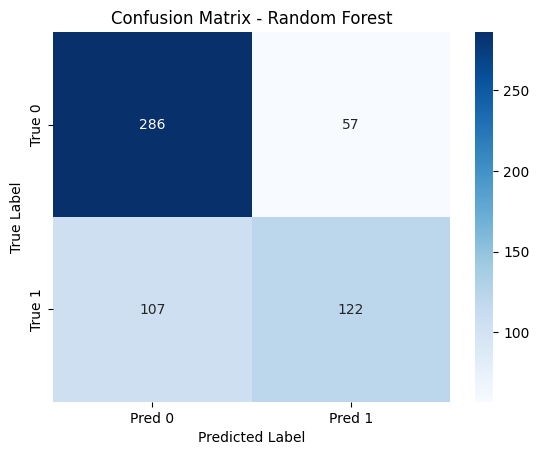

AUC-ROC Score: 0.7774

=== SVC ===
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.82      0.79       343
           1       0.70      0.63      0.66       229

    accuracy                           0.74       572
   macro avg       0.74      0.73      0.73       572
weighted avg       0.74      0.74      0.74       572

Accuracy: 0.7448
F1 Score: 0.7420


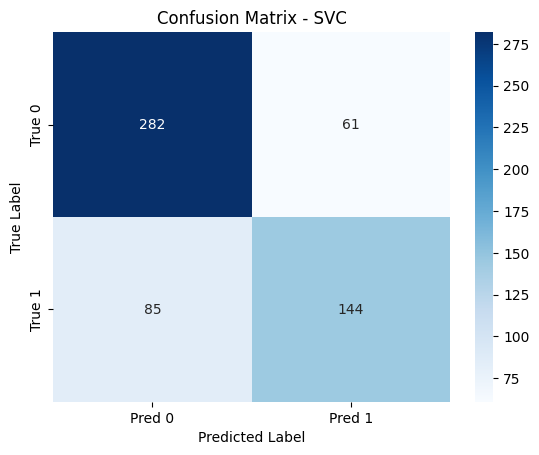

AUC-ROC Score: 0.8268


In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate probabilities for AUC-ROC score
    try:
        y_proba = model.predict_proba(X_test)[:, 1]
    except AttributeError:
        y_proba = None

    # Evaluate model performance
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)

    print(f"\n=== {name} ===")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    if y_proba is not None:
        print(f"AUC-ROC Score: {roc_auc_score(y_test, y_proba):.4f}")

`sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])` :
- annot=True displays the numbers within the cells.
- fmt='d' ensures integer formatting in cells.
- cmap='Blues' sets the color scheme to "Blues."
- xticklabels and yticklabels provide custom labels for the x and y axes.